In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image

In [2]:
!pip install pyyaml h5py 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [21]:
import os

home_dir = '/content/gdrive/MyDrive/Colab Notebooks/image_classification/'

train_img_dir = os.path.join(home_dir,'images/images')
test_img_dir = os.path.join(home_dir,'test/test/classify')
val_img_dir = os.path.join(home_dir,'validation/validation')

architecture_dir = os.path.join(train_img_dir, 'architecture')
art_culture_dir = os.path.join(train_img_dir, 'art and culture')
foods_drinks_dir = os.path.join(train_img_dir, 'foods and drinks')
travel_adv_dir = os.path.join(train_img_dir, 'travel and adventure')

print(f'Architecture Imgs: {len(os.listdir(architecture_dir))}')
print(f'Art and Culture Imgs: {len(os.listdir(art_culture_dir))}')
print(f'Foods and Drinks Imgs: {len(os.listdir(foods_drinks_dir))}')
print(f'Travel and Adventure Imgs: {len(os.listdir(travel_adv_dir))}')



SyntaxError: ignored

In [22]:
print(len(os.listdir(test_img_dir)))

10


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
	train_img_dir,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=176
)

validation_generator = validation_datagen.flow_from_directory(
	val_img_dir,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=176
)

test_generator = test_datagen.flow_from_directory(
	test_img_dir,
	target_size=(256,256),
	class_mode='categorical',
  batch_size=176
)


Found 35318 images belonging to 4 classes.
Found 122 images belonging to 4 classes.
Found 0 images belonging to 0 classes.


In [6]:
def create_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.5),
  
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

  model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

  return model

model = create_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [11]:
checkpoint_dir = os.path.join(home_dir,"model_img_classifier.ckpt")

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir,
                                                 save_weights_only=True,
                                                 verbose=1)

model.fit(train_generator, 
          epochs=30, 
          steps_per_epoch=15, 
          validation_data = validation_generator, 
          verbose = 1,
          callbacks=[cp_callback])

model.save_weights(f'{home_dir}/img_classifier.h5', overwrite=True)

Epoch 1/30
 6/15 [===========>..................] - ETA: 4:43 - loss: 1.5859 - accuracy: 0.2462

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 1.4692 - accuracy: 0.2659 
Epoch 1: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/model_img_classifier.ckpt
15/15 [==============================] - 562s 36s/step - loss: 1.4692 - accuracy: 0.2659 - val_loss: 1.3835 - val_accuracy: 0.2459
Epoch 2/30
15/15 [==============================] - ETA: 0s - loss: 1.4108 - accuracy: 0.3277 
Epoch 2: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/model_img_classifier.ckpt
15/15 [==============================] - 487s 32s/step - loss: 1.4108 - accuracy: 0.3277 - val_loss: 1.3648 - val_accuracy: 0.2377
Epoch 3/30
15/15 [==============================] - ETA: 0s - loss: 1.3188 - accuracy: 0.3652 
Epoch 3: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/model_img_classifier.ckpt
15/15 [==============================] - 447s 30s/step - loss: 1.3188 - accuracy: 0.3652 - val_loss: 1.2904 - val_accuracy: 0.45

/usr/local/lib/python3.9/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


15/15 [==============================] - ETA: 0s - loss: 1.1864 - accuracy: 0.4578 
Epoch 8: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/model_img_classifier.ckpt
15/15 [==============================] - 306s 20s/step - loss: 1.1864 - accuracy: 0.4578 - val_loss: 1.2564 - val_accuracy: 0.3852
Epoch 9/30
15/15 [==============================] - ETA: 0s - loss: 1.2187 - accuracy: 0.4261 
Epoch 9: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/model_img_classifier.ckpt
15/15 [==============================] - 292s 19s/step - loss: 1.2187 - accuracy: 0.4261 - val_loss: 1.2544 - val_accuracy: 0.4180
Epoch 10/30
15/15 [==============================] - ETA: 0s - loss: 1.1791 - accuracy: 0.4648 
Epoch 10: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/model_img_classifier.ckpt
15/15 [==============================] - 258s 17s/step - loss: 1.1791 - accuracy: 0.4648 - val_loss: 1.2749 - val_accuracy: 0.

In [28]:
#Retraining the model as it seems the model could be better if retrained for some other epochs

new_model = create_model()
new_model.load_weights(f'{home_dir}/img_classifier.h5')

checkpoint_dir = os.path.join(home_dir,"new_model_img_classifier.ckpt")

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir,
                                                 save_weights_only=False,
                                                 verbose=1)

new_model = new_model.fit(train_generator, 
          epochs=30, 
          steps_per_epoch=15, 
          validation_data = validation_generator, 
          verbose = 1,
          callbacks=[cp_callback])

new_model.save_model(f'{home_dir}/new_img_classifier.h5', overwrite=True)

Epoch 1/30
 1/15 [=>............................] - ETA: 2:23 - loss: 1.0760 - accuracy: 0.5398

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 1.1715 - accuracy: 0.5265
Epoch 1: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 116s 8s/step - loss: 1.1715 - accuracy: 0.5265 - val_loss: 0.8405 - val_accuracy: 0.7049
Epoch 2/30
 4/15 [=======>......................] - ETA: 1:08 - loss: 0.9695 - accuracy: 0.5952

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.9506 - accuracy: 0.6080

/usr/local/lib/python3.9/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))



Epoch 2: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 102s 7s/step - loss: 0.9506 - accuracy: 0.6080 - val_loss: 0.8557 - val_accuracy: 0.6639
Epoch 3/30
 1/15 [=>............................] - ETA: 1:12 - loss: 0.9151 - accuracy: 0.6193

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.9396 - accuracy: 0.6273
Epoch 3: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 96s 6s/step - loss: 0.9396 - accuracy: 0.6273 - val_loss: 0.9524 - val_accuracy: 0.6721
Epoch 4/30
15/15 [==============================] - ETA: 0s - loss: 0.9299 - accuracy: 0.6193
Epoch 4: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 91s 6s/step - loss: 0.9299 - accuracy: 0.6193 - val_loss: 1.1022 - val_accuracy: 0.4836
Epoch 5/30
 3/15 [=====>........................] - ETA: 1:00 - loss: 0.9926 - accuracy: 0.5890

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.9882 - accuracy: 0.6023
Epoch 5: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 93s 6s/step - loss: 0.9882 - accuracy: 0.6023 - val_loss: 0.8876 - val_accuracy: 0.7213
Epoch 6/30
 2/15 [===>..........................] - ETA: 1:10 - loss: 0.8189 - accuracy: 0.6619

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.8827 - accuracy: 0.6466
Epoch 6: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 90s 6s/step - loss: 0.8827 - accuracy: 0.6466 - val_loss: 1.1177 - val_accuracy: 0.5000
Epoch 7/30
10/15 [===================>..........] - ETA: 27s - loss: 0.9116 - accuracy: 0.6187

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.8857 - accuracy: 0.6367
Epoch 7: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 92s 6s/step - loss: 0.8857 - accuracy: 0.6367 - val_loss: 1.0746 - val_accuracy: 0.5984
Epoch 8/30
12/15 [=======================>......] - ETA: 15s - loss: 0.9255 - accuracy: 0.6274

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.9447 - accuracy: 0.6189
Epoch 8: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 84s 6s/step - loss: 0.9447 - accuracy: 0.6189 - val_loss: 0.8340 - val_accuracy: 0.7131
Epoch 9/30
 1/15 [=>............................] - ETA: 1:24 - loss: 0.7972 - accuracy: 0.6989

/usr/local/lib/python3.9/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 8/15 [===============>..............] - ETA: 36s - loss: 0.9358 - accuracy: 0.6335

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.9010 - accuracy: 0.6394
Epoch 9: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 83s 6s/step - loss: 0.9010 - accuracy: 0.6394 - val_loss: 0.7802 - val_accuracy: 0.6967
Epoch 10/30
11/15 [=====================>........] - ETA: 20s - loss: 0.8787 - accuracy: 0.6446

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.8908 - accuracy: 0.6405
Epoch 10: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 85s 6s/step - loss: 0.8908 - accuracy: 0.6405 - val_loss: 0.9810 - val_accuracy: 0.6311
Epoch 11/30
 2/15 [===>..........................] - ETA: 55s - loss: 0.8500 - accuracy: 0.6648 

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.9034 - accuracy: 0.6398
Epoch 11: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 84s 6s/step - loss: 0.9034 - accuracy: 0.6398 - val_loss: 0.8690 - val_accuracy: 0.7295
Epoch 12/30
 4/15 [=======>......................] - ETA: 56s - loss: 0.8278 - accuracy: 0.6847 

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.8672 - accuracy: 0.6648
Epoch 12: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 81s 5s/step - loss: 0.8672 - accuracy: 0.6648 - val_loss: 1.0240 - val_accuracy: 0.6230
Epoch 13/30
15/15 [==============================] - ETA: 0s - loss: 0.8200 - accuracy: 0.6654
Epoch 13: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 76s 5s/step - loss: 0.8200 - accuracy: 0.6654 - val_loss: 0.9478 - val_accuracy: 0.6803
Epoch 14/30
 4/15 [=======>......................] - ETA: 52s - loss: 1.2563 - accuracy: 0.5653

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.9509 - accuracy: 0.6470
Epoch 14: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 81s 5s/step - loss: 0.9509 - accuracy: 0.6470 - val_loss: 0.7735 - val_accuracy: 0.6803
Epoch 15/30
 1/15 [=>............................] - ETA: 1:18 - loss: 0.8692 - accuracy: 0.6364

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.8300 - accuracy: 0.6769
Epoch 15: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 79s 5s/step - loss: 0.8300 - accuracy: 0.6769 - val_loss: 1.1937 - val_accuracy: 0.5164
Epoch 16/30


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.8836 - accuracy: 0.6500
Epoch 16: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 74s 5s/step - loss: 0.8836 - accuracy: 0.6500 - val_loss: 0.7743 - val_accuracy: 0.7541
Epoch 17/30
 3/15 [=====>........................] - ETA: 1:01 - loss: 0.7258 - accuracy: 0.7386

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.8011 - accuracy: 0.6814
Epoch 17: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 77s 5s/step - loss: 0.8011 - accuracy: 0.6814 - val_loss: 0.7598 - val_accuracy: 0.7541
Epoch 18/30
 2/15 [===>..........................] - ETA: 58s - loss: 0.7899 - accuracy: 0.6875 

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.8630 - accuracy: 0.6595
Epoch 18: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 77s 5s/step - loss: 0.8630 - accuracy: 0.6595 - val_loss: 0.8357 - val_accuracy: 0.6967
Epoch 19/30
 4/15 [=======>......................] - ETA: 48s - loss: 0.7579 - accuracy: 0.7043

/usr/local/lib/python3.9/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


10/15 [===================>..........] - ETA: 22s - loss: 0.7851 - accuracy: 0.6915

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.8638 - accuracy: 0.6514
Epoch 19: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 77s 5s/step - loss: 0.8638 - accuracy: 0.6514 - val_loss: 0.9176 - val_accuracy: 0.6885
Epoch 20/30
 5/15 [=========>....................] - ETA: 47s - loss: 0.8240 - accuracy: 0.6716

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.8244 - accuracy: 0.6663
Epoch 20: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 75s 5s/step - loss: 0.8244 - accuracy: 0.6663 - val_loss: 0.6730 - val_accuracy: 0.7541
Epoch 21/30
13/15 [=========================>....] - ETA: 8s - loss: 0.8093 - accuracy: 0.6766 

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.8069 - accuracy: 0.6777
Epoch 21: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 73s 5s/step - loss: 0.8069 - accuracy: 0.6777 - val_loss: 1.2466 - val_accuracy: 0.5246
Epoch 22/30
 5/15 [=========>....................] - ETA: 42s - loss: 0.7831 - accuracy: 0.6830

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.8118 - accuracy: 0.6735
Epoch 22: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 72s 5s/step - loss: 0.8118 - accuracy: 0.6735 - val_loss: 0.6639 - val_accuracy: 0.7787
Epoch 23/30
15/15 [==============================] - ETA: 0s - loss: 0.8118 - accuracy: 0.6652
Epoch 23: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 72s 5s/step - loss: 0.8118 - accuracy: 0.6652 - val_loss: 0.7242 - val_accuracy: 0.7213
Epoch 24/30
 9/15 [=================>............] - ETA: 27s - loss: 0.7794 - accuracy: 0.6926

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.8169 - accuracy: 0.6818
Epoch 24: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 78s 5s/step - loss: 0.8169 - accuracy: 0.6818 - val_loss: 0.8294 - val_accuracy: 0.6967
Epoch 25/30
 6/15 [===========>..................] - ETA: 33s - loss: 0.7676 - accuracy: 0.6970

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.7920 - accuracy: 0.6955
Epoch 25: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 69s 5s/step - loss: 0.7920 - accuracy: 0.6955 - val_loss: 1.0745 - val_accuracy: 0.6967
Epoch 26/30
 3/15 [=====>........................] - ETA: 51s - loss: 0.9889 - accuracy: 0.6155 

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.8214 - accuracy: 0.6807
Epoch 26: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 73s 5s/step - loss: 0.8214 - accuracy: 0.6807 - val_loss: 0.8401 - val_accuracy: 0.7131
Epoch 27/30
 4/15 [=======>......................] - ETA: 45s - loss: 0.7590 - accuracy: 0.6960

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.8075 - accuracy: 0.6803
Epoch 27: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 69s 5s/step - loss: 0.8075 - accuracy: 0.6803 - val_loss: 1.4054 - val_accuracy: 0.5164
Epoch 28/30
 9/15 [=================>............] - ETA: 26s - loss: 0.8783 - accuracy: 0.6484

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.7990 - accuracy: 0.6856
Epoch 28: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 72s 5s/step - loss: 0.7990 - accuracy: 0.6856 - val_loss: 1.1829 - val_accuracy: 0.5820
Epoch 29/30
 5/15 [=========>....................] - ETA: 44s - loss: 0.7772 - accuracy: 0.6898

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.8015 - accuracy: 0.6962
Epoch 29: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 71s 5s/step - loss: 0.8015 - accuracy: 0.6962 - val_loss: 0.8045 - val_accuracy: 0.7295
Epoch 30/30
 8/15 [===============>..............] - ETA: 27s - loss: 0.7296 - accuracy: 0.7280

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - ETA: 0s - loss: 0.7734 - accuracy: 0.7015
Epoch 30: saving model to /content/gdrive/MyDrive/Colab Notebooks/image_classification/new_model_img_classifier.ckpt


15/15 [==============================] - 68s 4s/step - loss: 0.7734 - accuracy: 0.7015 - val_loss: 0.7712 - val_accuracy: 0.6967


AttributeError: ignored

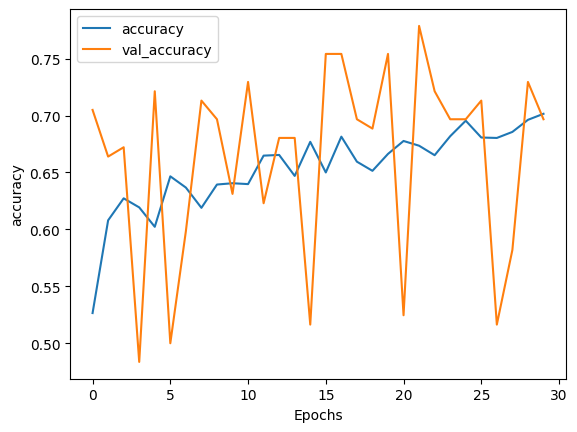

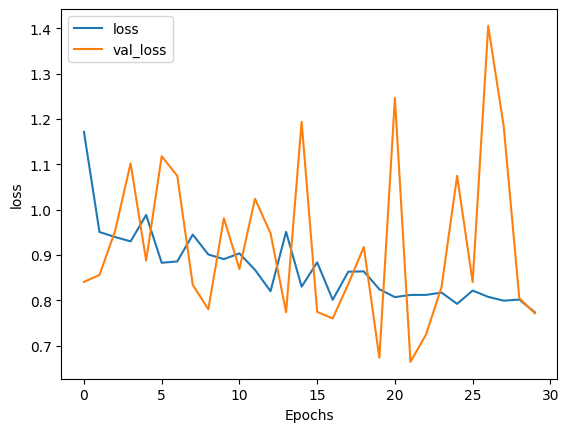

In [29]:
def plot_model_performance(model, metric):
    plt.plot(model.history[metric])
    plt.plot(model.history[f'val_{metric}'])
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()


plot_model_performance(new_model, 'accuracy')
plot_model_performance(new_model, 'loss')

In [29]:
new_model = create_model()
new_model.load_weights('/content/gdrive/MyDrive/Colab Notebooks/image_classification/img_classifier.h5')


In [ ]:
print(test_generator.class_indices

In [30]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array

for i in os.listdir(test_img_dir):
  img = load_img(f'{test_img_dir}/{i}', target_size=(256, 256))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  prediction = new_model.predict(images, batch_size=10)
  print(img)
  print(prediction)

1/1 [==============================] - 1s 867ms/step
<PIL.Image.Image image mode=RGB size=256x256 at 0x7FCD67A3DFA0>
[[0.000000e+00 1.000000e+00 1.407084e-13 0.000000e+00]]
1/1 [==============================] - 0s 90ms/step
<PIL.Image.Image image mode=RGB size=256x256 at 0x7FCD73AF8280>
[[0.0000000e+00 1.2287035e-22 1.0000000e+00 0.0000000e+00]]
1/1 [==============================] - 0s 76ms/step
<PIL.Image.Image image mode=RGB size=256x256 at 0x7FCD718B4E50>
[[2.035807e-14 0.000000e+00 0.000000e+00 1.000000e+00]]
1/1 [==============================] - 0s 94ms/step
<PIL.Image.Image image mode=RGB size=256x256 at 0x7FCE04380F10>
[[0. 1. 0. 0.]]
1/1 [==============================] - 0s 76ms/step
<PIL.Image.Image image mode=RGB size=256x256 at 0x7FCD71CE4550>
[[0. 1. 0. 0.]]
1/1 [==============================] - 0s 81ms/step
<PIL.Image.Image image mode=RGB size=256x256 at 0x7FCD71CEEAC0>
[[0.0000000e+00 2.9616777e-27 0.0000000e+00 1.0000000e+00]]
1/1 [==============================] - 

In [31]:
print(validation_generator.class_indices)

{'architecture': 0, 'art and culture': 1, 'food': 2, 'travel and adventure': 3}
